# Intro to TensorFlow: Classify images of clothing

In [1]:
# import Tensorflow
import tensorflow as tf

# import the other helper libraries required
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Softmax, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import sparse_categorical_crossentropy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import the Fashion MNIST dataset

This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. 

Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

In [2]:
#complete the code below:

fashion_mnist = tf.keras.datasets.fashion_mnist

#load the data into train_images, train_labels, test_images, test_labels

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
#store the class names in a list
#complete the code below

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
#check the dimensions of the training data

train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [5]:
#verify the number of train_lables

train_labels.shape

(60000,)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:



In [6]:
#verify the number of images in test_images by checking the dimensions

test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [7]:
#verify the number of images in test_labels

test_labels.shape

(10000,)

## Preprocess the data

The data must be preprocessed before training the network. 

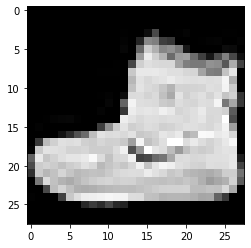

In [8]:
#plot a figure using the imshow() function to view the first image in train_images (train_images[0])

plt.imshow(train_images[0], cmap = 'gray')

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [9]:
#complete the code below
train_images = train_images / 255

test_images = test_images / 255

To verify that the data is in the correct format and that you're ready to build and train the network, display the first 25 images from the *training set* and display the class name below each image.

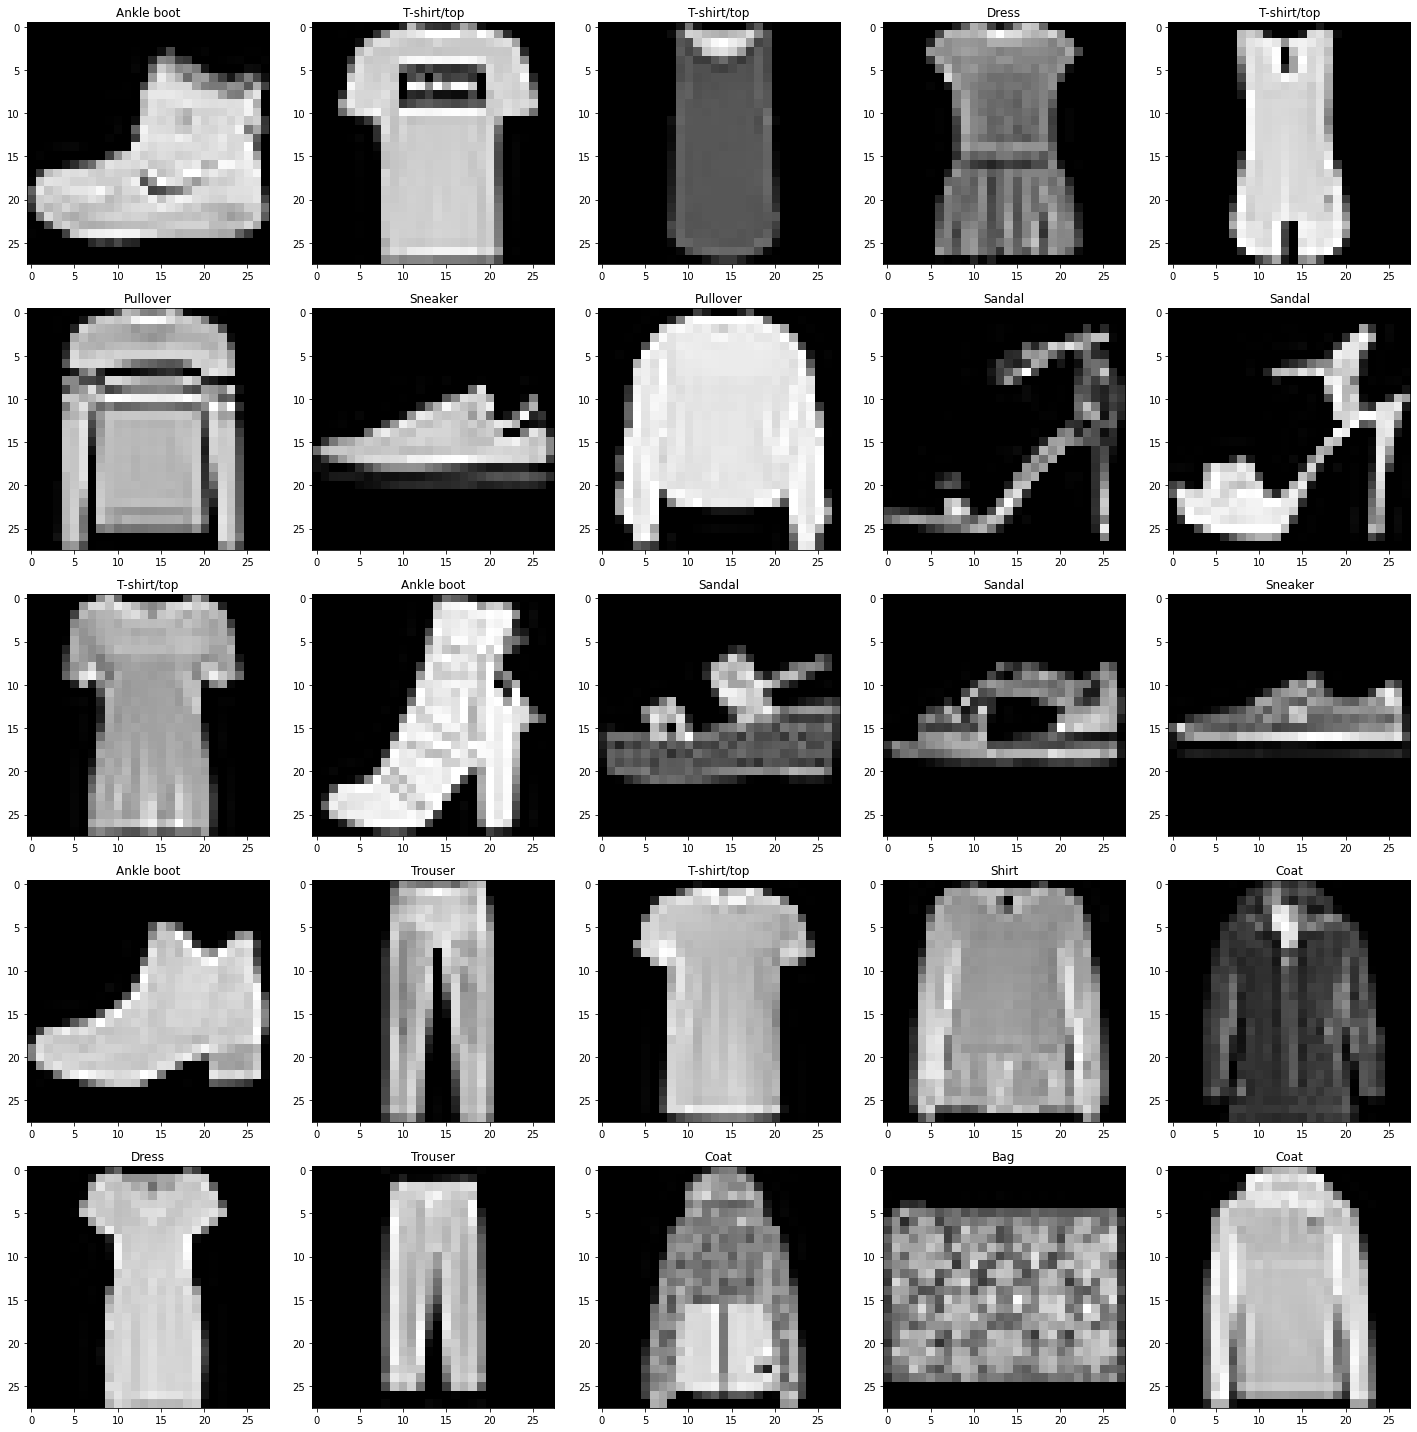

In [10]:
#write code below

fig, ax = plt.subplots(5, 5, figsize = (20, 20))
for i in range(5) :
  for j in range(5) :
    ax[i][j].imshow(train_images[5 * i + j], cmap = 'gray')
    ax[i][j].set_title(class_names[train_labels[5 * i + j]])

plt.tight_layout()    

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [86]:
#create a model having the layers defined below this cell

model = Sequential([
                    Flatten(),
                    Dense(units = 128, input_dim = 784, activation = 'relu'),
                    BatchNormalization(),
                    Dense(units = 10, activation = 'softmax')
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers with a 'BatchNormalization()' layer in between the 2 dense layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes. 
The Batch Normalization layer works by performing a series of operations on the incoming input data. The set of operations involves standardization, normalization, rescaling and shifting of offset of input values coming into the BN layer.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [87]:
#compile the model using model.compile using the adam optimizer, SparseCategoricalCrossentropy loss and accuracy as metrics

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.

### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [88]:
#write code below setting epochs=10:

model.fit(train_images, train_labels, batch_size = 500, epochs = 10, shuffle = True)

Epoch 1/10
120/120 [==============================] - 1s 8ms/step - loss: 0.5538 - accuracy: 0.8088
Epoch 2/10
120/120 [==============================] - 1s 8ms/step - loss: 0.3874 - accuracy: 0.8642
Epoch 3/10
120/120 [==============================] - 1s 8ms/step - loss: 0.3470 - accuracy: 0.8761
Epoch 4/10
120/120 [==============================] - 1s 8ms/step - loss: 0.3200 - accuracy: 0.8853
Epoch 5/10
120/120 [==============================] - 1s 8ms/step - loss: 0.2991 - accuracy: 0.8931
Epoch 6/10
120/120 [==============================] - 1s 8ms/step - loss: 0.2860 - accuracy: 0.8975
Epoch 7/10
120/120 [==============================] - 1s 8ms/step - loss: 0.2737 - accuracy: 0.9008
Epoch 8/10
120/120 [==============================] - 1s 8ms/step - loss: 0.2623 - accuracy: 0.9046
Epoch 9/10
120/120 [==============================] - 1s 8ms/step - loss: 0.2507 - accuracy: 0.9090
Epoch 10/10
120/120 [==============================] - 1s 8ms/step - loss: 0.2424 - accuracy: 0.9117

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset using model.evaluate():

In [89]:
#complete code below

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 [==============================] - 1s 1ms/step - loss: 0.3632 - accuracy: 0.8683

Test accuracy: 0.8683000206947327

Test loss: 0.36318865418434143


### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [93]:
#complete code below

probability_model = model
probability_model.add(Softmax())

In [94]:
#predict on the test_images using the probability_model

predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [95]:
predictions[0]

array([1.4668975e-04, 4.0746413e-06, 2.8356295e-05, 8.0037280e-05,
       1.9946388e-05, 6.6050846e-04, 1.5321010e-04, 1.1310663e-02,
       1.1788774e-04, 9.8747873e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [96]:
#use np.argmax to find the highest confidence value

np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [97]:
test_labels[0]

9

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.
Plot should look like this:
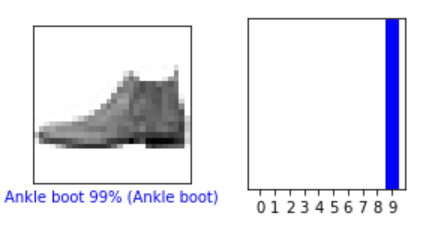

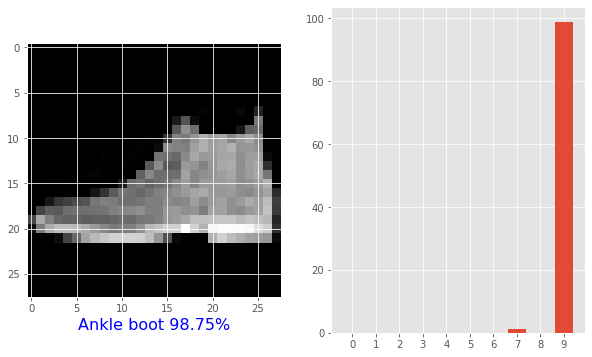

In [98]:
#plot the 0th image and next to that plot a bar graph of the predicted values for that image
#  if predicted_label is the same as the actual label of the image then the x_axis label should be in blue, whereas 
# if the predicted_label is not the same as the actual label of the image then the x_axis label should be in red

def plot_image(n) :
  xticks_array = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
  fig, ax = plt.subplots(1, 2, figsize = (10, 6))
  ax[0].imshow(test_images[n], cmap = 'gray')
  ax[1].bar(xticks_array, predictions[n] * 100)
  ax[1].set_xticks(xticks_array)
  ax[0].set_xlabel('{} {}%'.format(class_names[np.argmax(predictions[n])], 
                                  round(max(predictions[n]) * 100, 2)), 
                   fontsize = 16)
  if np.argmax(predictions[n]) == test_labels[n] :
    ax[0].xaxis.label.set_color('blue')
  else :
    ax[0].xaxis.label.set_color('red')

plot_image(0)

Similarly plot the image and predicted values for another value in the test_images

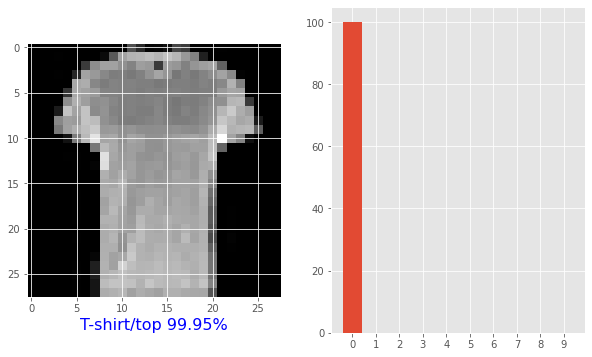

In [99]:
#write code below

plot_image(180)

plot several images with their predictions. Note that the model can be wrong even when very confident.

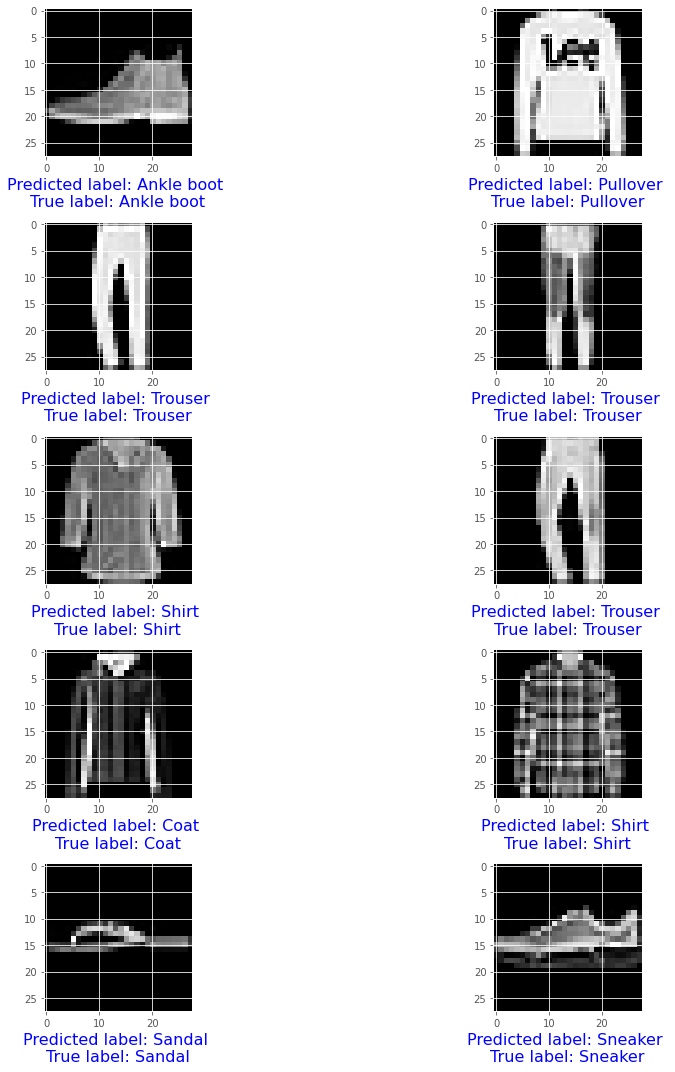

In [100]:
# Plot the first 10 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

fig, ax = plt.subplots(5, 2, figsize = (15, 15))
for i in range(5) :
  for j in range(2) :
    ax[i][j].imshow(test_images[2 * i + j], cmap = 'gray')
    ax[i][j].set_xlabel('Predicted label: {} \nTrue label: {}'.format(class_names[np.argmax(predictions[2 * i + j])],
                                                                class_names[test_labels[2 * i + j]]),
                  fontsize = 16)
    if np.argmax(predictions[2 * i + j]) == test_labels[2 * i + j] :
      ax[i][j].xaxis.label.set_color('blue')
    else :
      ax[i][j].xaxis.label.set_color('red')

plt.tight_layout()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [101]:
# Grab an image from the test dataset.

img = test_images[301]

`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [102]:
# Add the image to a batch where it's the only member.
#hint: use np.expand_dims
#complete code below

img = np.expand_dims(img, axis = 0)

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [25]:
#complete code below

predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.08775084 0.08761906 0.087926   0.18945344 0.10890022 0.08758894
  0.0879716  0.0875893  0.08761062 0.08758994]]


`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

Dress


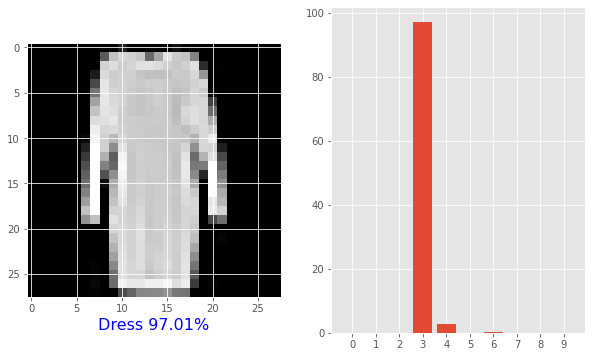

In [103]:
#print the predicted class for the image

print(class_names[np.argmax(predictions_single[0])])
plot_image(301)

# Regularization
In mathematics, statistics, and computer science, particularly in machine learning and inverse problems, regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting.

In order to improve the performance of the model, we use different regularization techniques. There are several techniques, but we will discuss 4 main techniques.

1. L1 Regularization
2. L2 Regularization
3. Dropout
4. Batch Normalization

In [27]:
#Basic pre-processing
#we're importing the iris dataset from sklearn for our model
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y = iris.target
y = to_categorical(y) #converting output to one-hot vector
ss = StandardScaler() #standardizing the data
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 16)

In [28]:
#explore the data (X and y) however you like, (using info(), describe, graphs, etc.) and write any 4 lines on what you understood about the dataset

X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

#Solution can be anything

In [29]:
X_df.head(10)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


In [30]:
y_df.head(10)

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [31]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [32]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float32
 1   1       150 non-null    float32
 2   2       150 non-null    float32
dtypes: float32(3)
memory usage: 1.9 KB


In [33]:
X_df.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [34]:
y_df.describe()

,0,1,2
count,150.000000,150.000000,150.000000
mean,0.333333,0.333333,0.333333
std,0.472983,0.472984,0.472984
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [146]:
print(sum(y_df[0]), sum(y_df[1]), sum(y_df[2]))

50.0 50.0 50.0


In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112, 3) (38, 3)


In [ ]:
"""
The dataset is split into data and target. 
The dataset has zero null values.
The dataset has already been pre-processed.
The data consits of the classes on based of which we will get the target values, i.e., 0, 1, or 2.
The dataset consits of equal values of each target, i.e., 50 0's, 50 1's and 50 2's.
The training dataset consits of 122 rows(or training sets) and the test dataset consists of 38 rows(or testing sets).
"""

And the model predicts a label as expected.

In [104]:
#model building

#run the code given below and observe the performance of this simple model having no regularization

model1 = Sequential([
    Dense(512, activation = 'tanh', input_shape = X_train[0].shape),
    Dense(512//2, activation = 'tanh'),
    Dense(512//4, activation = 'tanh'),
    Dense(512//8, activation = 'tanh'),
    Dense(32, activation = 'relu'),
    Dense(3, activation = 'softmax')
])
print(model1.summary())
model1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', 
               metrics = ['acc', 'mse'])

hist1 = model1.fit(X_train, y_train, epochs = 150, batch_size = 128, 
                   validation_data = (X_test, y_test))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               2560      
_________________________________________________________________
dense_61 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_62 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_63 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_64 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_65 (Dense)             (None, 3)                 99        
Total params: 177,219
Trainable params: 177,219
Non-trainable params: 0
_______________________________________________

In [105]:
#After training the model, evaluate the model and find the  loss, accuracy and mse on the test set using the evaluate() function
#print the loss, accuracy and MSE

loss1, acc1, mse1 = model1.evaluate(X_test, y_test)
print('Loss: {:.4f}\nAccuracy: {:.4f}\nMSE: {:.4f}'.format(loss1, acc1, mse1)) 

2/2 [==============================] - 0s 6ms/step - loss: 0.3834 - acc: 0.7632 - mse: 0.0821
Loss: 0.3834
Accuracy: 0.7632
MSE: 0.0821


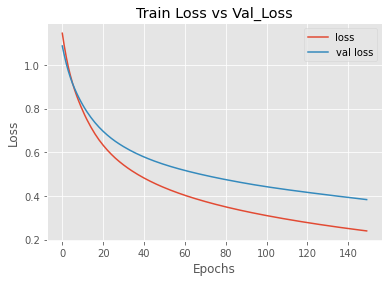

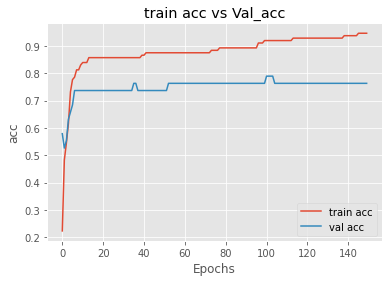

In [110]:
#Observe the plots for Validation Loss and Training Loss.

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist1.history['loss'], label = 'loss')
plt.plot(hist1.history['val_loss'], label ='val loss')
plt.title("Train Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# we observe that validation loss is increasing as compared to training loss. 
# This increase in training loss shows that our model is overfitted.

#similarly we plot for model accuracy 
plt.plot(hist1.history['acc'], label = 'train acc')
plt.plot(hist1.history['val_acc'], label ='val acc')
plt.title("train acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

#This again shows that validation accuracy is low as compared to training accuracy, which again shows signs of overfitting. 

## L1 Regularization:

In [106]:
#A commonly used Regularization technique is L1 regularization, also known as Lasso Regularization.

#The main concept of L1 Regularization is that we have to penalize our weights by adding absolute values of weight in our loss function, multiplied by a regularization parameter lambda λ, where λ is manually tuned to be greater than 0.

#to implement L1 regularization, create another model called model2 similar to model1, this time add an extra parameter kernel_regularizer, which we set it to ‘l1’ for L1 Regularization in the first Dense layer:

model2 = Sequential([
    Dense(512, activation = 'tanh', kernel_regularizer = 'l1', input_shape = X_train[0].shape),
    Dense(512//2, activation = 'tanh'),
    Dense(512//4, activation = 'tanh'),
    Dense(512//8, activation = 'tanh'),
    Dense(32, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

model2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', 
               metrics = ['acc', 'mse'])

hist2 = model2.fit(X_train, y_train, epochs = 150, batch_size = 128, 
                   validation_data = (X_test, y_test))

Epoch 1/150
1/1 [==============================] - 1s 580ms/step - loss: 2.3030 - acc: 0.2321 - mse: 0.2411 - val_loss: 2.2127 - val_acc: 0.3684 - val_mse: 0.2227
Epoch 2/150
1/1 [==============================] - 0s 30ms/step - loss: 2.2170 - acc: 0.3214 - mse: 0.2238 - val_loss: 2.1662 - val_acc: 0.6053 - val_mse: 0.2127
Epoch 3/150
1/1 [==============================] - 0s 26ms/step - loss: 2.1445 - acc: 0.6696 - mse: 0.2080 - val_loss: 2.1280 - val_acc: 0.6579 - val_mse: 0.2043
Epoch 4/150
1/1 [==============================] - 0s 28ms/step - loss: 2.0853 - acc: 0.7679 - mse: 0.1947 - val_loss: 2.0964 - val_acc: 0.6842 - val_mse: 0.1973
Epoch 5/150
1/1 [==============================] - 0s 26ms/step - loss: 2.0363 - acc: 0.8214 - mse: 0.1834 - val_loss: 2.0688 - val_acc: 0.7105 - val_mse: 0.1913
Epoch 6/150
1/1 [==============================] - 0s 27ms/step - loss: 1.9942 - acc: 0.8304 - mse: 0.1738 - val_loss: 2.0423 - val_acc: 0.7105 - val_mse: 0.1856
Epoch 7/150
1/1 [==========

In [107]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss2, acc2, mse2 = model2.evaluate(X_test, y_test)
print('Loss: {:.4f}\nAccuracy: {:.4f}\nMSE: {:.4f}'.format(loss2, acc2, mse2))

2/2 [==============================] - 0s 11ms/step - loss: 1.1514 - acc: 0.8421 - mse: 0.0595
Loss: 1.1514
Accuracy: 0.8421
MSE: 0.0595


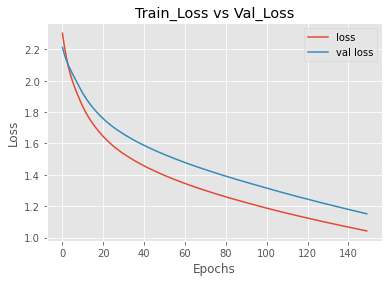

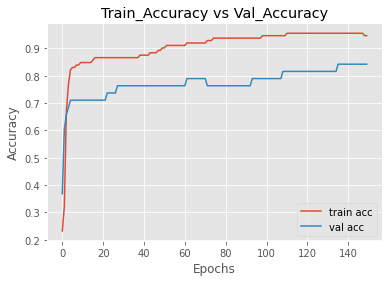

In [108]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist2.history['loss'], label = 'loss')
plt.plot(hist2.history['val_loss'], label = 'val loss')
plt.title("Train_Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist2.history['acc'], label = 'train acc')
plt.plot(hist2.history['val_acc'], label = 'val acc')
plt.title("Train_Accuracy vs Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [111]:
# create a new model model3, similar to model1 and model2 and add l1 in more layers to check if it improves the model or not.

model3 = Sequential([
    Dense(512, activation = 'tanh', kernel_regularizer = 'l1', input_shape = X_train[0].shape),
    Dense(512//2, activation = 'tanh', kernel_regularizer = 'l1'),
    Dense(512//4, activation = 'tanh', kernel_regularizer = 'l1'),
    Dense(512//8, activation = 'tanh', kernel_regularizer = 'l1'),
    Dense(32, activation = 'relu', kernel_regularizer = 'l1'),
    Dense(3, activation = 'softmax')
])

model3.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', 
               metrics = ['acc', 'mse'])

hist3 = model3.fit(X_train, y_train, epochs = 150, batch_size = 128, 
                   validation_data = (X_test, y_test))

Epoch 1/150
1/1 [==============================] - 1s 682ms/step - loss: 90.3211 - acc: 0.4821 - mse: 0.1918 - val_loss: 90.1041 - val_acc: 0.5526 - val_mse: 0.1821
Epoch 2/150
1/1 [==============================] - 0s 30ms/step - loss: 90.0895 - acc: 0.5714 - mse: 0.1785 - val_loss: 89.8875 - val_acc: 0.6053 - val_mse: 0.1720
Epoch 3/150
1/1 [==============================] - 0s 30ms/step - loss: 89.8670 - acc: 0.6429 - mse: 0.1670 - val_loss: 89.6787 - val_acc: 0.6053 - val_mse: 0.1637
Epoch 4/150
1/1 [==============================] - 0s 25ms/step - loss: 89.6528 - acc: 0.6786 - mse: 0.1572 - val_loss: 89.4768 - val_acc: 0.6053 - val_mse: 0.1570
Epoch 5/150
1/1 [==============================] - 0s 27ms/step - loss: 89.4451 - acc: 0.6875 - mse: 0.1489 - val_loss: 89.2799 - val_acc: 0.6053 - val_mse: 0.1516
Epoch 6/150
1/1 [==============================] - 0s 28ms/step - loss: 89.2432 - acc: 0.6964 - mse: 0.1421 - val_loss: 89.0865 - val_acc: 0.6053 - val_mse: 0.1470
Epoch 7/150
1/1

In [112]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss3, acc3, mse3 = model3.evaluate(X_test, y_test)
print('Loss: {:.4f}\nAccuracy: {:.4f}\nMSE: {:.4f}'.format(loss3, acc3, mse3))

2/2 [==============================] - 0s 7ms/step - loss: 65.5547 - acc: 0.8158 - mse: 0.0736
Loss: 65.5547
Accuracy: 0.8158
MSE: 0.0736


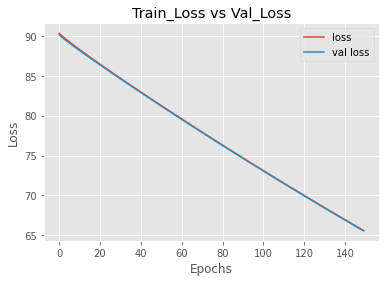

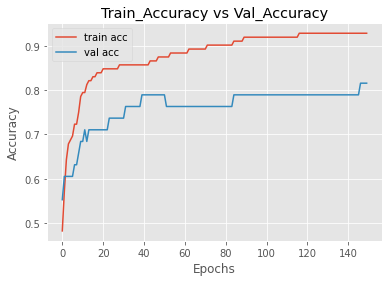

In [113]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist3.history['loss'], label = 'loss')
plt.plot(hist3.history['val_loss'], label = 'val loss')
plt.title("Train_Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist3.history['acc'], label = 'train acc')
plt.plot(hist3.history['val_acc'], label = 'val acc')
plt.title("Train_Accuracy vs Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## L2 Regularization

In [114]:
# L2 Regularization is another regularization technique which is also known as Ridge regularization. In L2 regularization we add the squared magnitude of weights to penalize our lost function.

#to implement L2 regularization, create another model called model4 similar to our initial basic model, this time add an extra parameter kernel_regularizer, which we set to ‘l2’ for L1 Regularization in the first Dense layer.
#compile and run the model

model4 = Sequential([
    Dense(512, activation = 'tanh', kernel_regularizer = 'l2', input_shape = X_train[0].shape),
    Dense(512//2, activation = 'tanh'),
    Dense(512//4, activation = 'tanh'),
    Dense(512//8, activation = 'tanh'),
    Dense(32, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

model4.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', 
               metrics = ['acc', 'mse'])

hist4 = model4.fit(X_train, y_train, epochs = 150, batch_size = 128, 
                   validation_data = (X_test, y_test))

Epoch 1/150
1/1 [==============================] - 1s 576ms/step - loss: 1.2999 - acc: 0.0536 - mse: 0.2463 - val_loss: 1.2438 - val_acc: 0.1579 - val_mse: 0.2353
Epoch 2/150
1/1 [==============================] - 0s 24ms/step - loss: 1.2175 - acc: 0.2411 - mse: 0.2296 - val_loss: 1.1789 - val_acc: 0.2895 - val_mse: 0.2216
Epoch 3/150
1/1 [==============================] - 0s 28ms/step - loss: 1.1506 - acc: 0.5268 - mse: 0.2151 - val_loss: 1.1235 - val_acc: 0.5789 - val_mse: 0.2091
Epoch 4/150
1/1 [==============================] - 0s 26ms/step - loss: 1.0926 - acc: 0.7232 - mse: 0.2018 - val_loss: 1.0739 - val_acc: 0.6316 - val_mse: 0.1975
Epoch 5/150
1/1 [==============================] - 0s 32ms/step - loss: 1.0420 - acc: 0.7857 - mse: 0.1898 - val_loss: 1.0316 - val_acc: 0.6316 - val_mse: 0.1875
Epoch 6/150
1/1 [==============================] - 0s 29ms/step - loss: 0.9982 - acc: 0.7857 - mse: 0.1793 - val_loss: 0.9946 - val_acc: 0.6579 - val_mse: 0.1785
Epoch 7/150
1/1 [==========

In [115]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss4, acc4, mse4 = model4.evaluate(X_test, y_test)
print('Loss: {:.4f}\nAccuracy: {:.4f}\nMSE: {:.4f}'.format(loss4, acc4, mse4))

2/2 [==============================] - 0s 6ms/step - loss: 0.3755 - acc: 0.8421 - mse: 0.0596
Loss: 0.3755
Accuracy: 0.8421
MSE: 0.0596


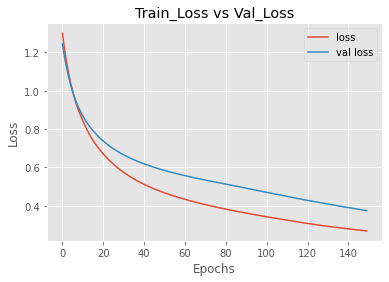

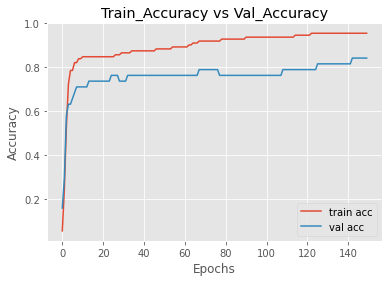

In [116]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist4.history['loss'], label = 'loss')
plt.plot(hist4.history['val_loss'], label = 'val loss')
plt.title("Train_Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist4.history['acc'], label = 'train acc')
plt.plot(hist4.history['val_acc'], label = 'val acc')
plt.title("Train_Accuracy vs Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [118]:
# Now create model5 having similar to the above models having L2 in all other layers.

model5 = Sequential([
    Dense(512, activation = 'tanh', kernel_regularizer = 'l2', input_shape = X_train[0].shape),
    Dense(512//2, activation = 'tanh', kernel_regularizer = 'l2'),
    Dense(512//4, activation = 'tanh', kernel_regularizer = 'l2'),
    Dense(512//8, activation = 'tanh', kernel_regularizer = 'l2'),
    Dense(32, activation = 'relu', kernel_regularizer = 'l2'),
    Dense(3, activation = 'softmax')
])

model5.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', 
               metrics = ['acc', 'mse'])

hist5 = model5.fit(X_train, y_train, epochs = 150, batch_size = 128, 
                   validation_data = (X_test, y_test))

Epoch 1/150
1/1 [==============================] - 1s 692ms/step - loss: 7.5351 - acc: 0.6518 - mse: 0.2115 - val_loss: 7.5035 - val_acc: 0.6316 - val_mse: 0.2048
Epoch 2/150
1/1 [==============================] - 0s 33ms/step - loss: 7.4946 - acc: 0.7232 - mse: 0.2030 - val_loss: 7.4802 - val_acc: 0.7368 - val_mse: 0.2000
Epoch 3/150
1/1 [==============================] - 0s 30ms/step - loss: 7.4579 - acc: 0.7946 - mse: 0.1951 - val_loss: 7.4582 - val_acc: 0.7632 - val_mse: 0.1955
Epoch 4/150
1/1 [==============================] - 0s 26ms/step - loss: 7.4235 - acc: 0.8214 - mse: 0.1875 - val_loss: 7.4377 - val_acc: 0.7368 - val_mse: 0.1913
Epoch 5/150
1/1 [==============================] - 0s 25ms/step - loss: 7.3927 - acc: 0.8214 - mse: 0.1808 - val_loss: 7.4182 - val_acc: 0.7105 - val_mse: 0.1873
Epoch 6/150
1/1 [==============================] - 0s 30ms/step - loss: 7.3651 - acc: 0.8214 - mse: 0.1748 - val_loss: 7.3999 - val_acc: 0.7105 - val_mse: 0.1836
Epoch 7/150
1/1 [==========

In [119]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss5, acc5, mse5 = model5.evaluate(X_test, y_test)
print('Loss: {:.4f}\nAccuracy: {:.4f}\nMSE: {:.4f}'.format(loss5, acc5, mse5))

2/2 [==============================] - 0s 4ms/step - loss: 6.4700 - acc: 0.8158 - mse: 0.0683
Loss: 6.4700
Accuracy: 0.8158
MSE: 0.0683


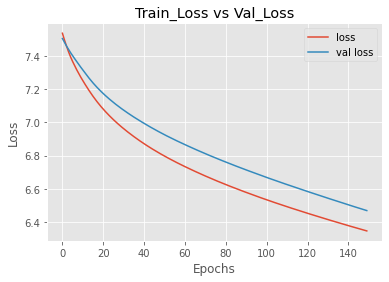

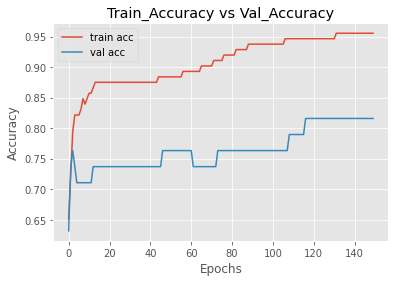

In [120]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist5.history['loss'], label = 'loss')
plt.plot(hist5.history['val_loss'], label = 'val loss')
plt.title("Train_Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist5.history['acc'], label = 'train acc')
plt.plot(hist5.history['val_acc'], label = 'val acc')
plt.title("Train_Accuracy vs Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Dropout

In [128]:
#Another common way to avoid regularization is by using the Dropout technique. The main idea behind using dropout is that we randomly turn off some neurons in our layer based on some probability.

# Create a model6 having same layers as the basic model. Add a dropout layer in this model, lets say after the 1st dense layer, and set dropout rate as 50%

model6 = Sequential([
    Dense(512, activation = 'tanh', input_shape = X_train[0].shape),
    Dropout(rate = 0.5),
    Dense(512//2, activation = 'tanh'),
    Dense(512//4, activation = 'tanh'),
    Dense(512//8, activation = 'tanh'),
    Dense(32, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

model6.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', 
               metrics = ['acc', 'mse'])

hist6 = model6.fit(X_train, y_train, epochs = 150, batch_size = 128, 
                   validation_data = (X_test, y_test))

Epoch 1/150
1/1 [==============================] - 1s 612ms/step - loss: 1.1557 - acc: 0.2857 - mse: 0.2358 - val_loss: 1.1099 - val_acc: 0.2632 - val_mse: 0.2253
Epoch 2/150
1/1 [==============================] - 0s 26ms/step - loss: 1.1288 - acc: 0.2411 - mse: 0.2306 - val_loss: 1.0776 - val_acc: 0.2632 - val_mse: 0.2185
Epoch 3/150
1/1 [==============================] - 0s 31ms/step - loss: 1.0941 - acc: 0.2857 - mse: 0.2224 - val_loss: 1.0444 - val_acc: 0.3158 - val_mse: 0.2113
Epoch 4/150
1/1 [==============================] - 0s 25ms/step - loss: 1.0903 - acc: 0.3214 - mse: 0.2226 - val_loss: 1.0118 - val_acc: 0.5526 - val_mse: 0.2039
Epoch 5/150
1/1 [==============================] - 0s 29ms/step - loss: 1.0377 - acc: 0.4286 - mse: 0.2105 - val_loss: 0.9807 - val_acc: 0.6842 - val_mse: 0.1968
Epoch 6/150
1/1 [==============================] - 0s 30ms/step - loss: 0.9968 - acc: 0.6071 - mse: 0.2012 - val_loss: 0.9531 - val_acc: 0.6316 - val_mse: 0.1904
Epoch 7/150
1/1 [==========

In [129]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss6, acc6, mse6 = model6.evaluate(X_test, y_test)
print('Loss: {:.4f}\nAccuracy: {:.4f}\nMSE: {:.4f}'.format(loss6, acc6, mse6))

2/2 [==============================] - 0s 4ms/step - loss: 0.3627 - acc: 0.8158 - mse: 0.0789
Loss: 0.3627
Accuracy: 0.8158
MSE: 0.0789


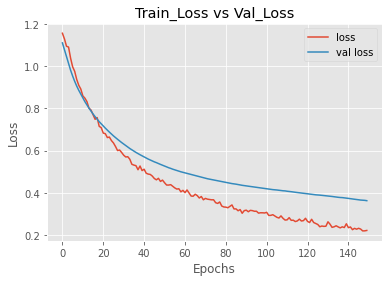

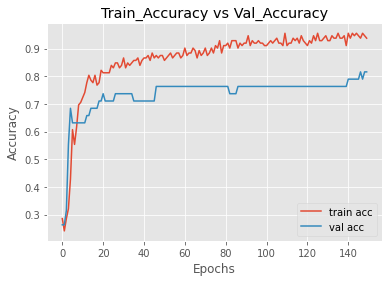

In [130]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist6.history['loss'], label = 'loss')
plt.plot(hist6.history['val_loss'], label = 'val loss')
plt.title("Train_Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist6.history['acc'], label = 'train acc')
plt.plot(hist6.history['val_acc'], label = 'val acc')
plt.title("Train_Accuracy vs Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [131]:
# Create model7, having more dropout layers, having a dropout rate of your choice

model7 = Sequential([
    Dense(512, activation = 'tanh', input_shape = X_train[0].shape),
    Dropout(rate = 0.4),
    Dense(512//2, activation = 'tanh'),
    Dropout(rate = 0.4),
    Dense(512//4, activation = 'tanh'),
    Dropout(rate = 0.4),
    Dense(512//8, activation = 'tanh'),
    Dropout(rate = 0.4),
    Dense(32, activation = 'relu'),
    Dropout(rate = 0.4),
    Dense(3, activation = 'softmax')
])

model7.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', 
               metrics = ['acc', 'mse'])

hist7 = model7.fit(X_train, y_train, epochs = 150, batch_size = 128, 
                   validation_data = (X_test, y_test))

Epoch 1/150
1/1 [==============================] - 1s 683ms/step - loss: 1.1289 - acc: 0.3482 - mse: 0.2268 - val_loss: 1.0030 - val_acc: 0.6842 - val_mse: 0.2007
Epoch 2/150
1/1 [==============================] - 0s 30ms/step - loss: 1.2158 - acc: 0.2679 - mse: 0.2419 - val_loss: 0.9695 - val_acc: 0.6579 - val_mse: 0.1928
Epoch 3/150
1/1 [==============================] - 0s 28ms/step - loss: 1.0313 - acc: 0.4732 - mse: 0.2055 - val_loss: 0.9440 - val_acc: 0.6842 - val_mse: 0.1866
Epoch 4/150
1/1 [==============================] - 0s 26ms/step - loss: 1.0431 - acc: 0.4018 - mse: 0.2118 - val_loss: 0.9173 - val_acc: 0.7368 - val_mse: 0.1801
Epoch 5/150
1/1 [==============================] - 0s 26ms/step - loss: 0.9922 - acc: 0.4464 - mse: 0.2000 - val_loss: 0.8947 - val_acc: 0.7632 - val_mse: 0.1747
Epoch 6/150
1/1 [==============================] - 0s 28ms/step - loss: 0.9914 - acc: 0.4732 - mse: 0.1990 - val_loss: 0.8768 - val_acc: 0.7632 - val_mse: 0.1704
Epoch 7/150
1/1 [==========

In [132]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss7, acc7, mse7 = model7.evaluate(X_test, y_test)
print('Loss: {:.4f}\nAccuracy: {:.4f}\nMSE: {:.4f}'.format(loss7, acc7, mse7))

2/2 [==============================] - 0s 6ms/step - loss: 0.4062 - acc: 0.7368 - mse: 0.0885
Loss: 0.4062
Accuracy: 0.7368
MSE: 0.0885


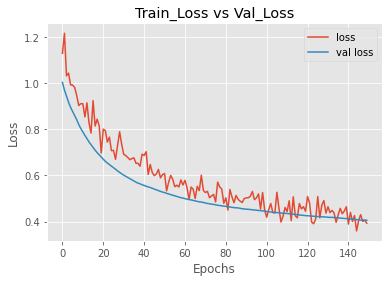

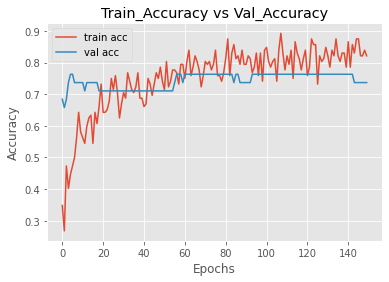

In [133]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist7.history['loss'], label = 'loss')
plt.plot(hist7.history['val_loss'], label = 'val loss')
plt.title("Train_Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist7.history['acc'], label = 'train acc')
plt.plot(hist7.history['val_acc'], label = 'val acc')
plt.title("Train_Accuracy vs Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Batch Normalization

In [134]:
# The main idea behind batch normalization is that we normalize the input layer by using several techniques (sklearn.preprocessing.StandardScaler) in our case, which improves the model performance, so if the input layer is benefitted by normalization, why not normalize the hidden layers, which will improve and fasten learning even further.

# To add it in your TensorFlow model, just add tf.keras.layers.BatchNormalization() after your layers.

#Create model8, having same layers as the first model, but this time add a BatchNormalization layer after the first or second dense layer

model8 = Sequential([
    Dense(512, activation = 'tanh', input_shape = X_train[0].shape),
    BatchNormalization(),
    Dense(512//2, activation = 'tanh'),
    Dense(512//4, activation = 'tanh'),
    Dense(512//8, activation = 'tanh'),
    Dense(32, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

model8.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', 
               metrics = ['acc', 'mse'])

hist8 = model8.fit(X_train, y_train, epochs = 150, batch_size = 128, 
                   validation_data = (X_test, y_test))

Epoch 1/150
1/1 [==============================] - 1s 738ms/step - loss: 1.0820 - acc: 0.4464 - mse: 0.2174 - val_loss: 1.0268 - val_acc: 0.6842 - val_mse: 0.2062
Epoch 2/150
1/1 [==============================] - 0s 31ms/step - loss: 0.7488 - acc: 0.8304 - mse: 0.1400 - val_loss: 0.9805 - val_acc: 0.7368 - val_mse: 0.1954
Epoch 3/150
1/1 [==============================] - 0s 30ms/step - loss: 0.6392 - acc: 0.8393 - mse: 0.1142 - val_loss: 0.9469 - val_acc: 0.7105 - val_mse: 0.1875
Epoch 4/150
1/1 [==============================] - 0s 26ms/step - loss: 0.5727 - acc: 0.8482 - mse: 0.0996 - val_loss: 0.9211 - val_acc: 0.7105 - val_mse: 0.1814
Epoch 5/150
1/1 [==============================] - 0s 31ms/step - loss: 0.5284 - acc: 0.8571 - mse: 0.0904 - val_loss: 0.9007 - val_acc: 0.7105 - val_mse: 0.1766
Epoch 6/150
1/1 [==============================] - 0s 27ms/step - loss: 0.4962 - acc: 0.8750 - mse: 0.0840 - val_loss: 0.8833 - val_acc: 0.7368 - val_mse: 0.1725
Epoch 7/150
1/1 [==========

In [135]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set


loss8, acc8, mse8 = model8.evaluate(X_test, y_test)
print('Loss: {:.4f}\nAccuracy: {:.4f}\nMSE: {:.4f}'.format(loss8, acc8, mse8))

2/2 [==============================] - 0s 4ms/step - loss: 0.4290 - acc: 0.8947 - mse: 0.0817
Loss: 0.4290
Accuracy: 0.8947
MSE: 0.0817


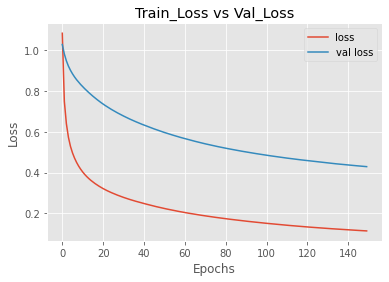

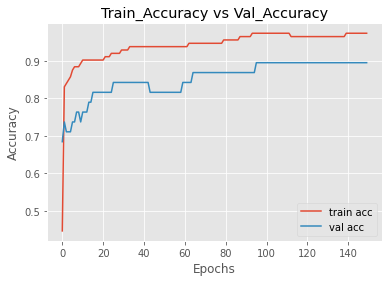

In [136]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist8.history['loss'], label = 'loss')
plt.plot(hist8.history['val_loss'], label = 'val loss')
plt.title("Train_Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist8.history['acc'], label = 'train acc')
plt.plot(hist8.history['val_acc'], label = 'val acc')
plt.title("Train_Accuracy vs Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [137]:
# Now create model9, having a BatchNormalization layer after each dense layer

model9 = Sequential([
    Dense(512, activation = 'tanh', input_shape = X_train[0].shape),
    BatchNormalization(),
    Dense(512//2, activation = 'tanh'),
    BatchNormalization(),
    Dense(512//4, activation = 'tanh'),
    BatchNormalization(),
    Dense(512//8, activation = 'tanh'),
    BatchNormalization(),
    Dense(32, activation = 'relu'),
    BatchNormalization(),
    Dense(3, activation = 'softmax')
])

model9.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', 
               metrics = ['acc', 'mse'])

hist9 = model9.fit(X_train, y_train, epochs = 150, batch_size = 128, 
                   validation_data = (X_test, y_test))

Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 1.1480 - acc: 0.5625 - mse: 0.2178 - val_loss: 0.9081 - val_acc: 0.6579 - val_mse: 0.1769
Epoch 2/150
1/1 [==============================] - 0s 33ms/step - loss: 0.5199 - acc: 0.7946 - mse: 0.0990 - val_loss: 0.8758 - val_acc: 0.7105 - val_mse: 0.1689
Epoch 3/150
1/1 [==============================] - 0s 30ms/step - loss: 0.2962 - acc: 0.8929 - mse: 0.0547 - val_loss: 0.8654 - val_acc: 0.7368 - val_mse: 0.1664
Epoch 4/150
1/1 [==============================] - 0s 28ms/step - loss: 0.2292 - acc: 0.9464 - mse: 0.0368 - val_loss: 0.8570 - val_acc: 0.7632 - val_mse: 0.1645
Epoch 5/150
1/1 [==============================] - 0s 28ms/step - loss: 0.1987 - acc: 0.9643 - mse: 0.0292 - val_loss: 0.8489 - val_acc: 0.7632 - val_mse: 0.1625
Epoch 6/150
1/1 [==============================] - 0s 33ms/step - loss: 0.1798 - acc: 0.9821 - mse: 0.0254 - val_loss: 0.8413 - val_acc: 0.7368 - val_mse: 0.1608
Epoch 7/150
1/1 [=============

In [138]:
#just how we used evaluate() in the basic model previously, use it again to find the loss, accuracy and MSE on the test set

loss9, acc9, mse9 = model9.evaluate(X_test, y_test)
print('Loss: {:.4f}\nAccuracy: {:.4f}\nMSE: {:.4f}'.format(loss9, acc9, mse9))

2/2 [==============================] - 0s 5ms/step - loss: 0.5023 - acc: 0.8158 - mse: 0.0917
Loss: 0.5023
Accuracy: 0.8158
MSE: 0.0917


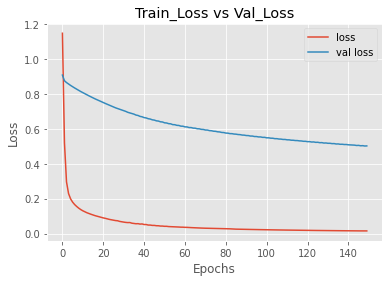

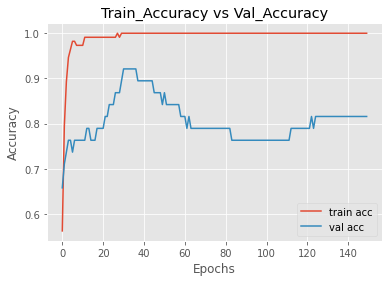

In [139]:
# Plot the train loss vs validation loss and train accuracy vs validation accuracy graphs just like we did before

plt.style.use('ggplot')
plt.plot(hist9.history['loss'], label = 'loss')
plt.plot(hist9.history['val_loss'], label = 'val loss')
plt.title("Train_Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(hist9.history['acc'], label = 'train acc')
plt.plot(hist9.history['val_acc'], label = 'val acc')
plt.title("Train_Accuracy vs Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#After completing the above tasks, note down what you've understood and observed in each of the 9 models and what type of regularization works best for this dataset

"""
Regularization is a technique used to reduce overfitting of the model, so that the function can decently predict the values in test case.

In L1 regularization, it increases the accuracy of the normal model,  but if used in every layer, it decreses accuracy a bit but significantly increases the loss function (because it is affected by outliers) which isn't good for a neural network.
Mean squard error is also less in case of model2 as compared to model3.
Therefore, it is good to avoid l1 regularization in every layer.

In L2 regularization, it also increases the accuracy of the model, similar to l1, but when used in every layer, it decreases the accuracy.
Mean squared error is also less in case of model4 as compared to model5.
Therefore, model 4 is better than model5.

In Dropout, it increases the accuracy but not as much as compared to l1 and l2, but when used after every layer, it significantly decreases the accuracy.
Mean squared error is less in model6 than model7.
Therefore, model6 is better than model7, but not better than model2 and model3.

In Batch-Normalization, it significantly increases the accuarcy of the model, more than l1 and l2, but when used after every layer, it decreases the accuracy of the model and increases the loss a little bit.
Mean squared error is also less in model8 than model9.
Therefore, model8 is better than model9, as well as all the other models.

model2 and model4 has the same testing accuracy and but model4 has less loss function value as well as less computationally expensive, but model2 is more robust and has more possibilities.
model8 gives the highest accuray but has a greater loss than model4, but the difference between the loss function values of training and test data is more as compared to model4 and model2.
In terms of computational speed, model4 is good, in terms of consistency of prediction, model2 is good, but in case of accuracy model8 is good.
"""